In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Data

In [2]:
# make the data more readable and index the col 0
df_in = pd.read_csv("/content/Consumer_Airfare_Report__Table_3_-_City-Pair_Markets_With_A_Substantial_Increase_In_Average_Fare_20250421.csv",index_col = 0)
df_de = pd.read_csv("/content/Consumer_Airfare_Report__Table_4_-_City-Pair_Markets_With_A_Substantial_Decrease_In_Average_Fare_20250421.csv",index_col = 0)
data = pd.concat([df_in, df_de], axis=0)
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/Consumer_Airfare_Report__Table_3_-_City-Pair_Markets_With_A_Substantial_Increase_In_Average_Fare_20250421.csv'

### Data Cleaning

In [ ]:
#delete the colunms, quarter, citymarketid_1, citymarketid_2, Geocoded_City1, Geocoded_City2
data_clean = data.drop(['citymarketid_1', 'citymarketid_2', 'Geocoded_City1', 'Geocoded_City2'], axis=1, inplace=False)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6262 entries, Table 3 to Table 4
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6262 non-null   int64  
 1   quarter             6262 non-null   int64  
 2   city1               6262 non-null   object 
 3   city2               6262 non-null   object 
 4   cur_passengers      6262 non-null   int64  
 5   cur_fare            6262 non-null   float64
 6   ly_fare             6262 non-null   float64
 7   ly_passengers       6262 non-null   int64  
 8   amount_change       6262 non-null   float64
 9   percent_change      6262 non-null   float64
 10  amount_change_pax   6262 non-null   int64  
 11  percent_change_pax  6262 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 636.0+ KB


In [ ]:
#join 'city1' and 'city2' columns into a new column 'route'
data_clean['route'] = data_clean['city1'].astype(str) + ' - ' + data_clean['city2'].astype(str)

# Reorder the columns
cols = list(data_clean.columns)
cols.insert(1, cols.pop(cols.index('route')))  # Move 'city_pair' to the second position
data_clean = data_clean[cols]

# Delete the 'city1' and 'city2' columns
data_clean = data_clean.drop(['city1', 'city2'], axis=1)


# Display the updated DataFrame
data_clean.head()


,Year,route,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax
tbl,,,,,,,,,,,
Table 3,2024,"Colorado Springs, CO - Phoenix, AZ",4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233
Table 3,2024,"Colorado Springs, CO - Las Vegas, NV",4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417
Table 3,2024,"Colorado Springs, CO - Los Angeles, CA (Metrop...",4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209
Table 3,2024,"Denver, CO - Jacksonville, FL",4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705
Table 3,2024,"Atlanta, GA (Metropolitan Area) - Cleveland, O...",4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402


In [ ]:
# hot encode route and join it the the main df with binay feture. to predict popular destination
city_pairs = pd.get_dummies(data_clean['route'],prefix= "route")
data_clean = pd.concat([data_clean, city_pairs], axis=1)
data_clean  = data_clean.drop(['route'], axis=1)
data_clean.head()

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,...,"route_Tallahassee, FL - Tampa, FL (Metropolitan Area)","route_Tallahassee, FL - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - Toledo, OH","route_Tampa, FL (Metropolitan Area) - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - West Palm Beach/Palm Beach, FL","route_Trenton, NJ - West Palm Beach/Palm Beach, FL","route_Tulsa, OK - Washington, DC (Metropolitan Area)","route_Valparaiso, FL - Washington, DC (Metropolitan Area)","route_Washington, DC (Metropolitan Area) - West Palm Beach/Palm Beach, FL","route_Washington, DC (Metropolitan Area) - Wichita, KS"
tbl,,,,,,,,,,,,,,,,,,,,,
Table 3,2024,4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#find the dtype of Colorado Springs, CO - Phoenix, AZ
data_clean['route_Tallahassee, FL - Tampa, FL (Metropolitan Area)'].dtype


dtype('bool')

### Predict popular route

In [ ]:
route_y = data_clean['cur_passengers']

# Get route columns automatically
route_cols = [col for col in data_clean.columns if col.startswith('route_')]

# Add other useful features
feature_cols = ['Year', 'quarter', 'ly_passengers', 'cur_fare', 'ly_fare',
                'amount_change', 'percent_change', 'percent_change_pax'] + route_cols

route_X = data_clean[feature_cols]


In [ ]:
route_X_train, route_X_test, route_y_train, route_y_test = train_test_split(route_X, route_y, test_size=0.2, random_state=42)

pr = LinearRegression()
pr.fit(route_X_train, route_y_train)

LinearRegression()

In [ ]:
data_clean['predicted_passengers'] = pr.predict(route_X)

In [ ]:
# Step 1: Extract only the route columns and predicted passengers
route_df = data_clean[route_cols + ['predicted_passengers']].copy()

# Step 2: Melt the one-hot encoded routes
route_melted = route_df.melt(id_vars='predicted_passengers', var_name='route', value_name='is_route')

# Step 3: Filter for actual route rows (where route flag = 1)
route_melted = route_melted[route_melted['is_route'] == 1]

# Step 4: Group and average predicted passengers by route
popular_routes = route_melted.groupby('route')['predicted_passengers'].mean().sort_values(ascending=False)

# Display top 10 most popular routes
print(popular_routes.head(10))


route
route_Los Angeles, CA (Metropolitan Area) - San Francisco, CA (Metropolitan Area)      1.559007e+06
route_Miami, FL (Metropolitan Area) - New York City, NY (Metropolitan Area)            1.436087e+06
route_Chicago, IL - New York City, NY (Metropolitan Area)                              7.437382e+05
route_Los Angeles, CA (Metropolitan Area) - Seattle, WA                                7.418168e+05
route_Las Vegas, NV - Los Angeles, CA (Metropolitan Area)                              6.502167e+05
route_Chicago, IL - Los Angeles, CA (Metropolitan Area)                                5.998254e+05
route_San Diego, CA - San Francisco, CA (Metropolitan Area)                            5.903650e+05
route_Boston, MA (Metropolitan Area) - Washington, DC (Metropolitan Area)              5.681900e+05
route_Las Vegas, NV - San Francisco, CA (Metropolitan Area)                            5.606598e+05
route_New York City, NY (Metropolitan Area) - San Francisco, CA (Metropolitan Area)    5.08416

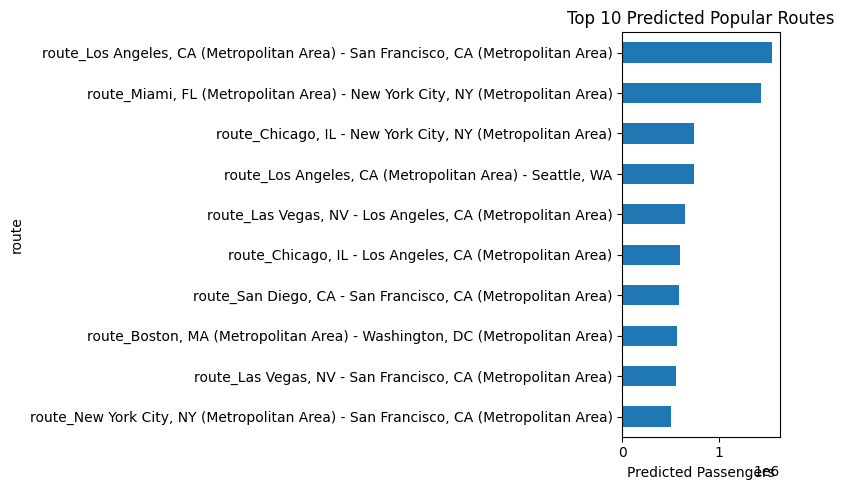

In [ ]:
popular_routes.head(10).plot(kind='barh', figsize=(8,5))
plt.gca().invert_yaxis()
plt.xlabel("Predicted Passengers")
plt.title("Top 10 Predicted Popular Routes")
plt.tight_layout()
plt.show()


In [6]:
#find r2 score
from sklearn.metrics import r2_score
r2_score(route_y_test, pr.predict(route_X_test))


NameError: name 'route_y_test' is not defined